In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def df_dt(x, t, a, b, c, d):
    """Función del sistema en forma canónica"""
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01
# Condiciones iniciales
x0 = 40   # Presas
y0 = 9    # Depredadores
conds_iniciales = np.array([x0, y0])
# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

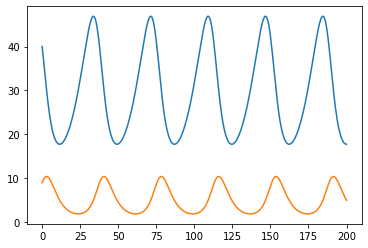

In [2]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

In [4]:
tf = 200
N = 800
t = np.linspace(0, tf, N)
len(t)

800

In [5]:
# Las ecuaciones diferenciales del modelo SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [6]:
def plot(S, I, R, t, divide_by=1):
    # Dibujamos los datos de S(t), I(t) y R(t)
    fig, ax = plt.subplots()
    ax.plot(t, S / divide_by, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I / divide_by, 'r', alpha=0.5, lw=2, label='Infectado')
    ax.plot(t, R / divide_by, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
    ax.set_xlabel('Tiempo /días')
    ax.set_ylabel(f'Número (dividido por {divide_by:,})')
    legend = ax.legend()
    #fig.show() # descomenta esto si no estás en Jupyter

In [7]:
# población inicial, N.
N = 47_000_000 # poblaciçon de un país como España
 
# Número inicial de infectados y recuperados, I0 and R0.
I0 = 10_000
R0 = 0
 
# El resto, casi todo N, es susceptible de infectarse
S0 = N - I0 - R0
 
# Tasas de contagio y recuperación.
beta = 0.1 # contagio
gamma = 0.02 # recuperación
 
# Pasos temporales (en días)
t = np.linspace(0, 365, 365)
 
# condiciones iniciales
y0 = S0, I0, R0

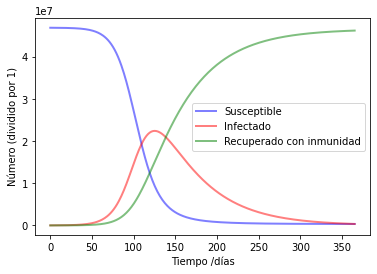

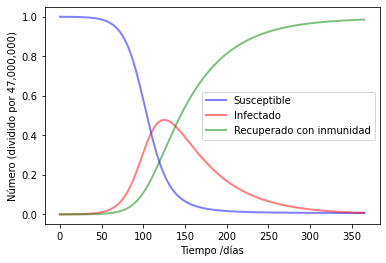

In [8]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
 
plot(S, I, R, t) # Datos sin normalizar
plot(S, I, R, t, divide_by=N) # Datos normalizados

# Prueba IEFS

In [ ]:
def deriv(y, t, N, beta, gamma):
    S1, S2, I1, I2, R , V = y
    
    dS1 = v*S1-lamnda*S1-mu*S1
    dV  = v*S1-sigmav*V-mu*V
    dI1 = lamnda*S1-rho1*I1-mu*I1
    dS2 = sigmav*V+sigmai*R-lamnda*S2-mu*S2
    dI2 = lamnda*S2-rho2*I2-mu*I2
    dR  = rho1*I1+rho2*I2-sigmai*R-mu*R
        
    
    return dSdt, dIdt, dRdt

# Ref: 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
- https://pybonacci.org/2020/09/16/modelo-sir-modelo-epidemiologico-con-python/
- https://pybonacci.org/2015/01/05/ecuaciones-de-lotka-volterra-modelo-presa-depredador/